In [1]:
import matplotlib.pyplot as plt 
#해상도 설정
%matplotlib inline
%config InlineBackend.figure_format='retina'
#한글설정 
plt.rc("font",family="Malgun Gothic")#폰트 조정
plt.rc("axes",unicode_minus=False)#y축 #그래프에서도 한글이 보이도록 
# 경고메세지 숨김
import warnings
warnings.filterwarnings(action='ignore')
#warnings.filterwarnings(action='default')보임!


**<font size='6' color='red'>ch13.데이터시각화 </font>**

# 3절 .Seaborn

- matplotlib를 기반으로 만든 고수준 그래픽 라이브러리<br>
    공식 사이트 : https://seaborn.pydata.org/<br>
    그래프 API : https://seaborn.pydata.org/api.htm<br>
- Seaborn으로 그래프를 그리기 위해서 다음 단계 따릅니다<br>
    1) 데이터준비<br>
    2) 미적속성 설정<br>
    3) 함수를 이용하여 그래프 그리기<br>
    4) 그래프 출력, 저장
    

# 3.1 데이터 준비하기

In [4]:
import seaborn as sns
iris=sns.load_dataset("iris")


(150, 5)

In [11]:
print(iris.shape)
print()
print(iris.tail())
print()
print(iris.describe())
print()
print(iris.describe(exclude='float64'))
print()
print(iris.info())#결측치를 제외한 갯수, dtype  pandas.unmberic (형변환)
print()
print(iris.isna().sum())#결측치 확인

(150, 5)

     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

       species
count      150
uniq

In [16]:
# R 패키지의 데이ㅓ 셋 가져오기(Titanic)
import statsmodels.api as sm
r_titanic = sm.datasets.get_rdataset('Titanic',package='datasets').data
print(type(r_titanic))
r_titanic.head()#데이터 프레임

<class 'pandas.core.frame.DataFrame'>


,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0


In [21]:
titanic=sns.load_dataset("titanic")
titanic.head()
titanic.isna().sum()
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [23]:
titanic.head()
#survived 생존여부, pclass 티켓클래스1,2,3등석,sibsp(함께 탑승한 형제와 배우자수 )
#parch(함께 탑승한 부모, 아이수) fare(탑승료)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 3.2미적 속성 설정하기

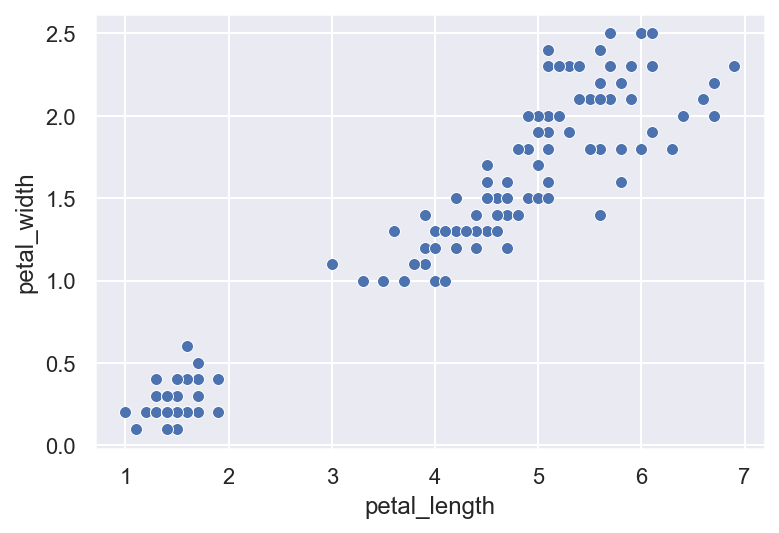

In [27]:
#속성설정
sns.set(style='darkgrid')
#style: white(기본),darkgrid,whitegrid,dark,ticke
sns.scatterplot(x='petal_length',y='petal_width',data=iris)#산점도 출력
plt.show()

**2)컬러 팔레트**
https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette<br>
https://matplotlib.org/tutorials/colors/colormaps.html<br>
https://seaborn.pydata.org/tutorial/color_palettes.html<br>
http://hleecaster.com/wp-content/uploads/2019/12/article2_image9.png<br>

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

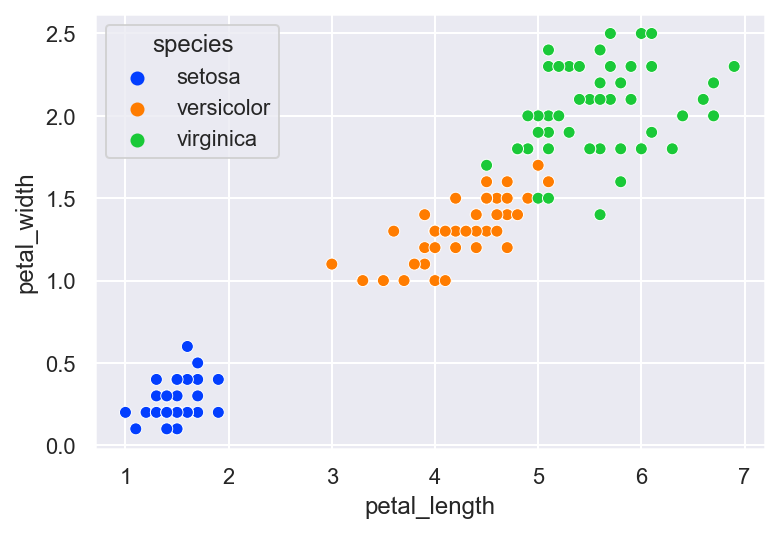

In [41]:
sns.set(palette='bright')
#bright/deep/muted/pastel/dark/color blind/ etc...
sns.scatterplot(x='petal_length',y='petal_width',data=iris,hue='species')
#hue은 그룹별 셋팅설정!

**3)컨텍스트지정(비율)**

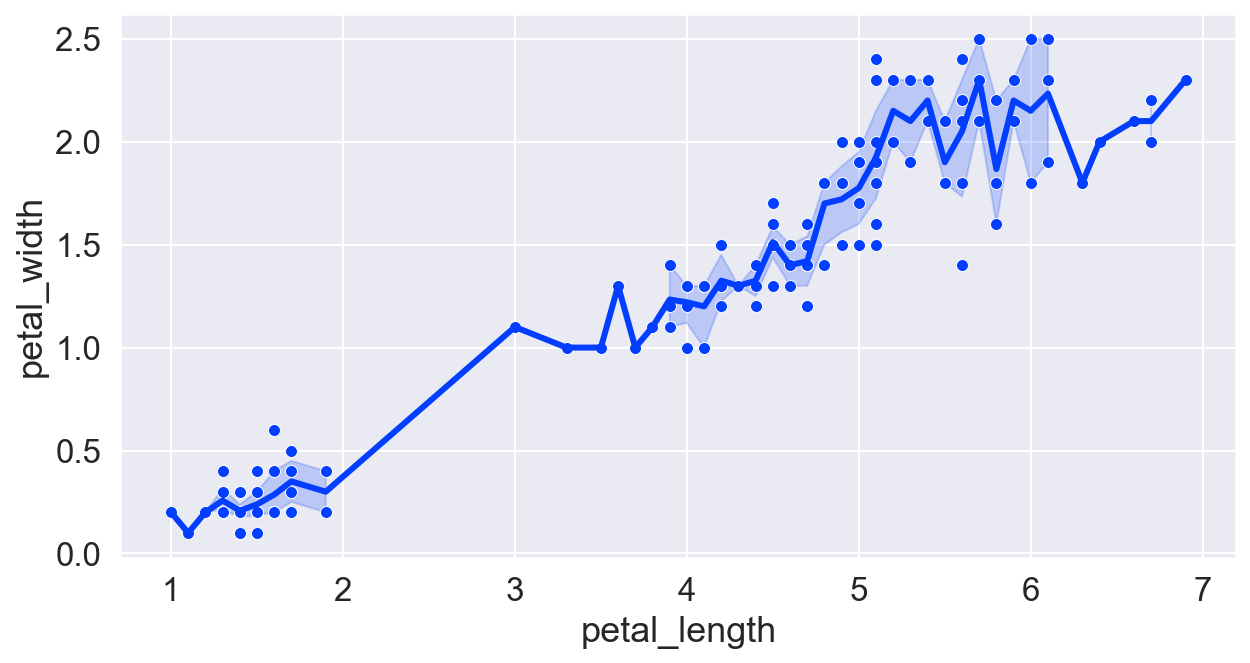

In [51]:
plt.figure(figsize=(10,5))
sns.set_context("notebook",font_scale=1.5,rc={'lines.linewidth':3})
#notebook(기본값:1배율),paper(0.8),talk(1.3),poster(1.6)
sns.lineplot(x='petal_length',y='petal_width',data=iris)
sns.scatterplot(x='petal_length',y='petal_width',data=iris)
plt.show()

## 3.3 Seaborn 함수로 그래프 그리기

**1)Relational plots: 관계형 그래프(연속 데이터)**

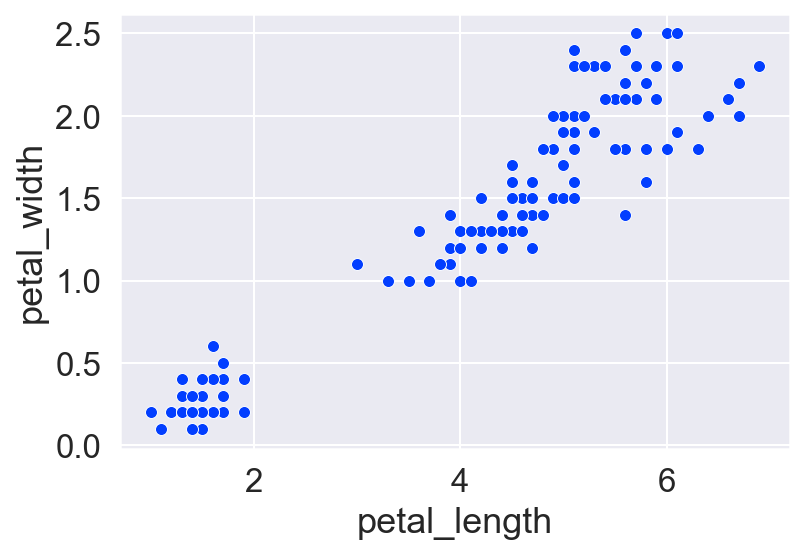

In [53]:
sns.scatterplot(x="petal_length",y="petal_width",data=iris)
plt.show()

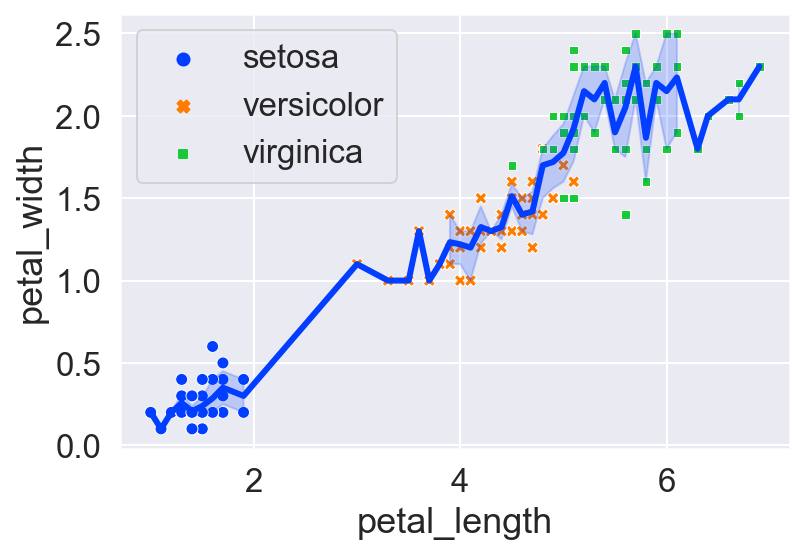

In [66]:
#hue 속성에 그룹변수를 넣어 그룹화하여 그룹별 다른 색상 다른 style
iris.describe(exclude='float64')
sns.scatterplot(data=iris,x='petal_length',y='petal_width',hue='species',
               palette="bright",style='species')
sns.lineplot(data=iris,x='petal_length',y='petal_width', palette='deep')
plt.show()

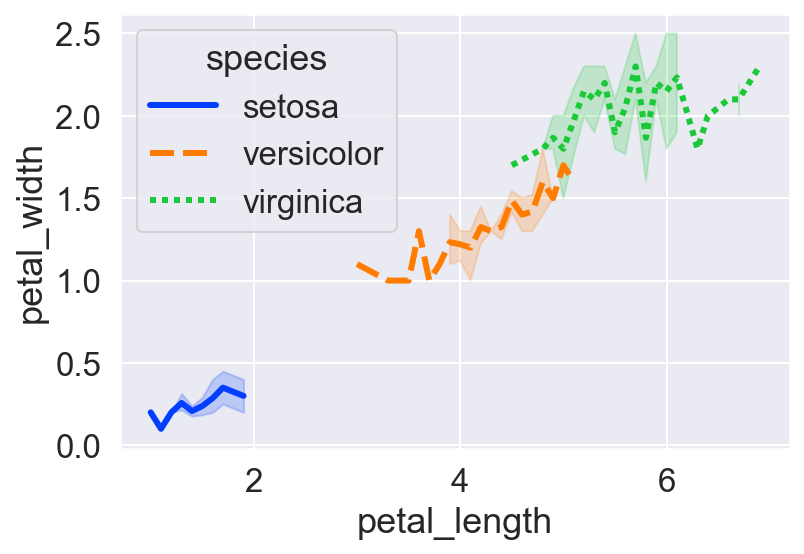

In [73]:
sns.lineplot(data=iris,x='petal_length',y='petal_width', hue='species'
            ,style='species')
#sns.scatterplot(data=iris,x='petal_length',y='petal_width', hue='species')
plt.show()

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

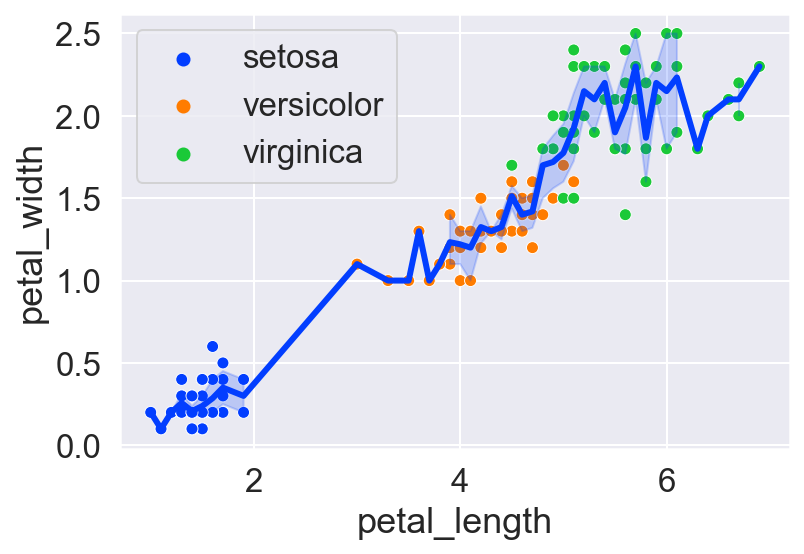

In [75]:
sns.scatterplot(data=iris,x='petal_length',y='petal_width', hue='species')
sns.lineplot(data=iris,x='petal_length',y='petal_width')

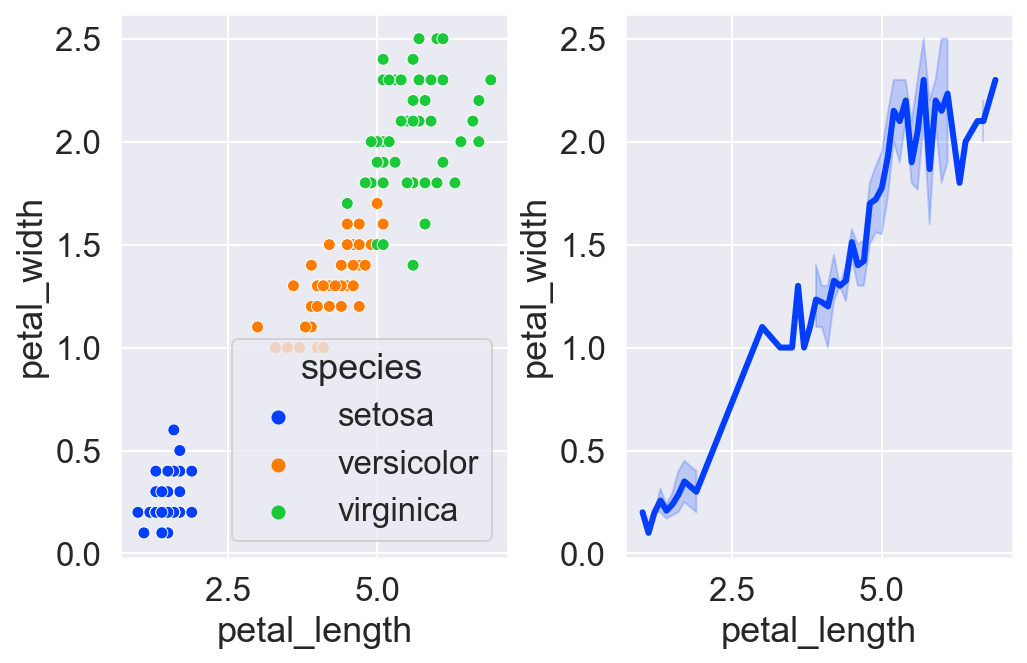

In [81]:
flg,axes=plt.subplots(ncols=2,figsize=(8,5))
plt.subplots_adjust(wspace=0.3)
sns.scatterplot(x='petal_length',y='petal_width',data=iris,hue='species',
               ax=axes[0])
sns.lineplot(x='petal_length',y='petal_width',data=iris,ax=axes[1])
plt.show()


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

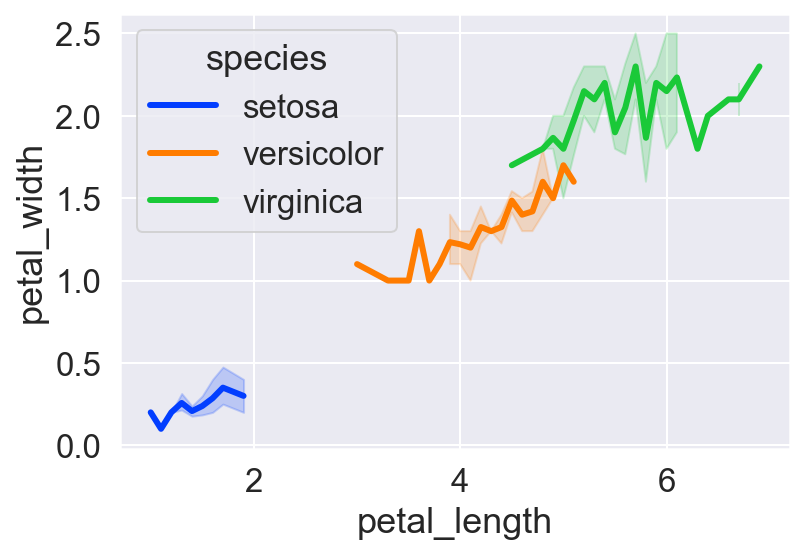

In [82]:
sns.lineplot(x='petal_length',y='petal_width',data=iris,hue='species')

<Figure size 216x360 with 0 Axes>

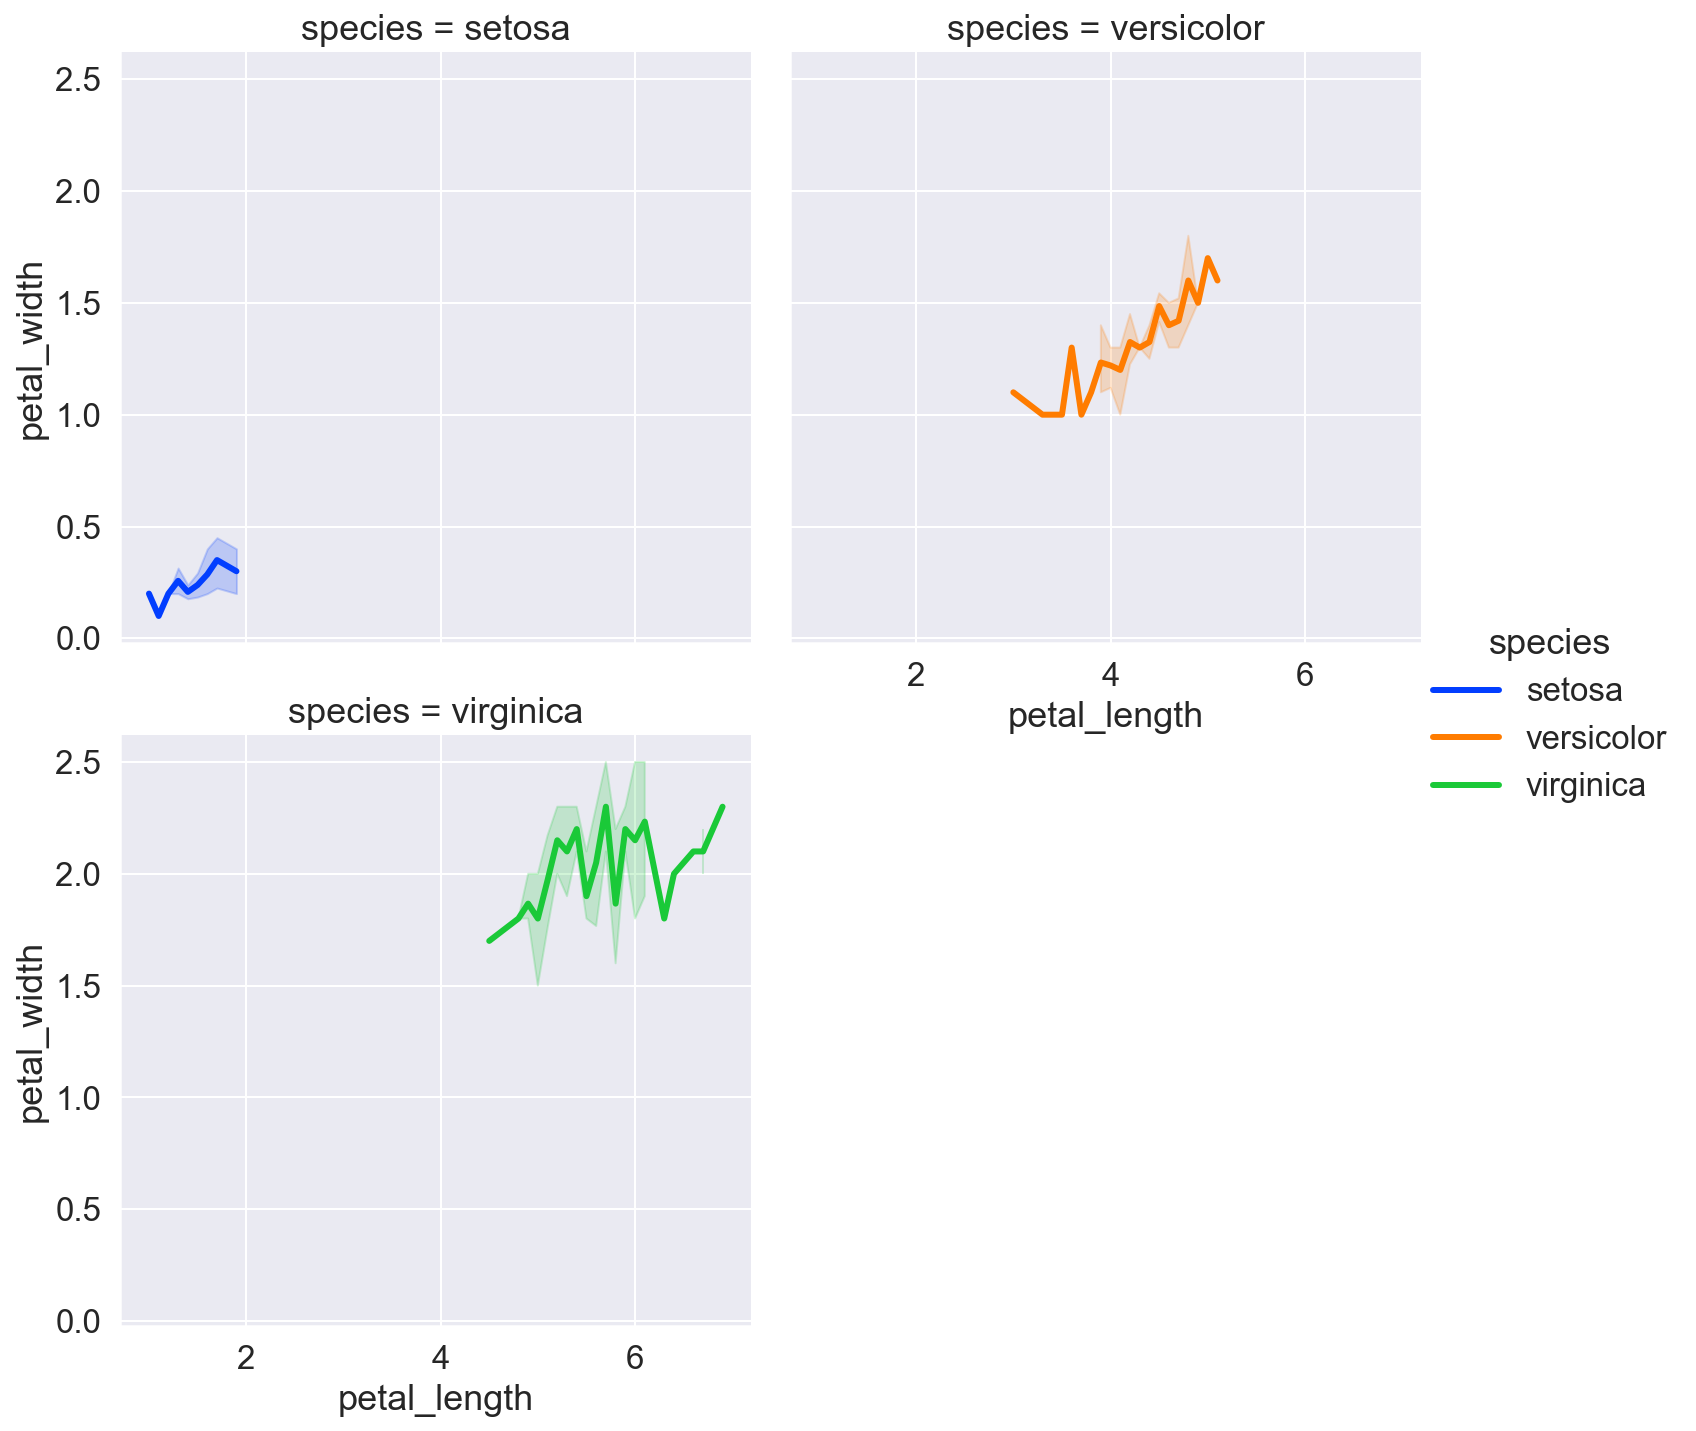

In [89]:
#lineplot을 서브플롯으로 표현: relplot
plt.figure(figsize=(3,5))
sns.relplot(x='petal_length',y='petal_width',data=iris,hue='species',
           kind="line",#기본값은 scatter
            col='species',# col 단위로 서브플롯 표현
           col_wrap=2)#한줄에 표현될 서브플롯 수

**2)catagorical plots: 범주형 그래프** 

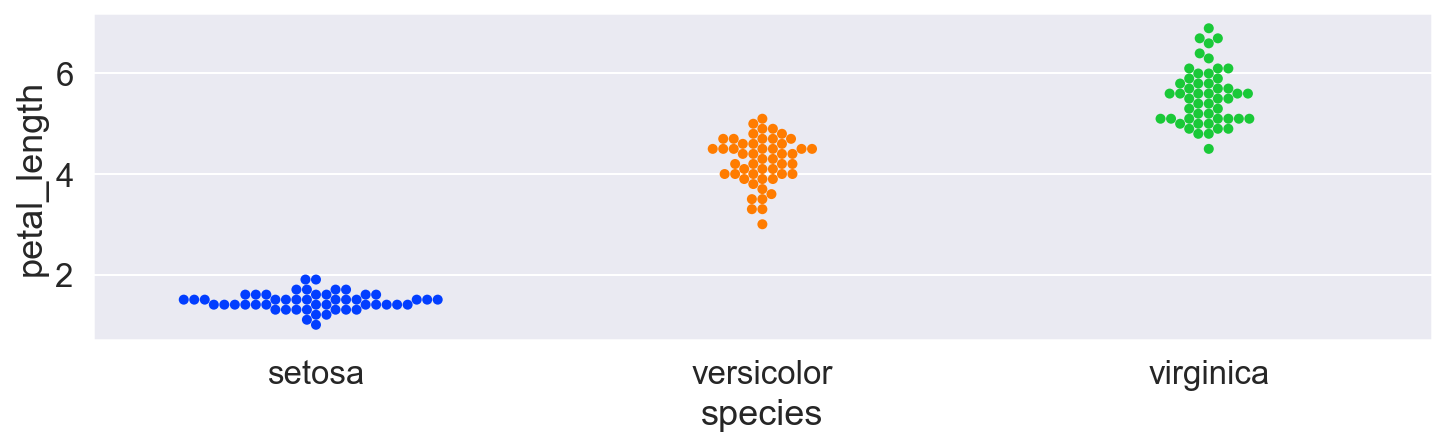

In [98]:
# x축이 범주형 데이터일 경우 scatterplot은 적합하지 않아 다른 것들...
#ax=sns.scatterplot(x='species',y='petal_length',data=iris)
#x축이 범주형일떄 쓰는 산점도1
plt.figure(figsize=(12,3))
#ax=sns.stripplot(x='species',y='petal_length',data=iris)
ax=sns.swarmplot(x='species',y='petal_length',data=iris)

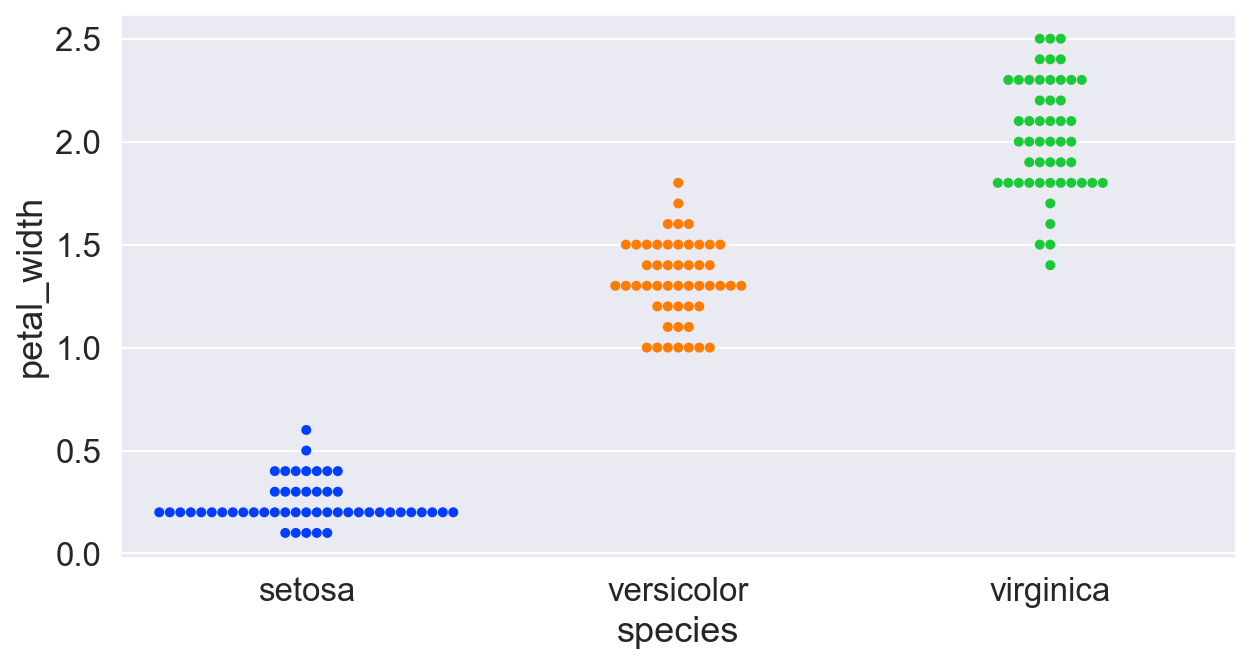

In [100]:
#x축이 범주형일떄 쓰는 산점도2
plt.figure(figsize=(10,5))
ax=sns.swarmplot(x='species',y='petal_width',data=iris)

In [101]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


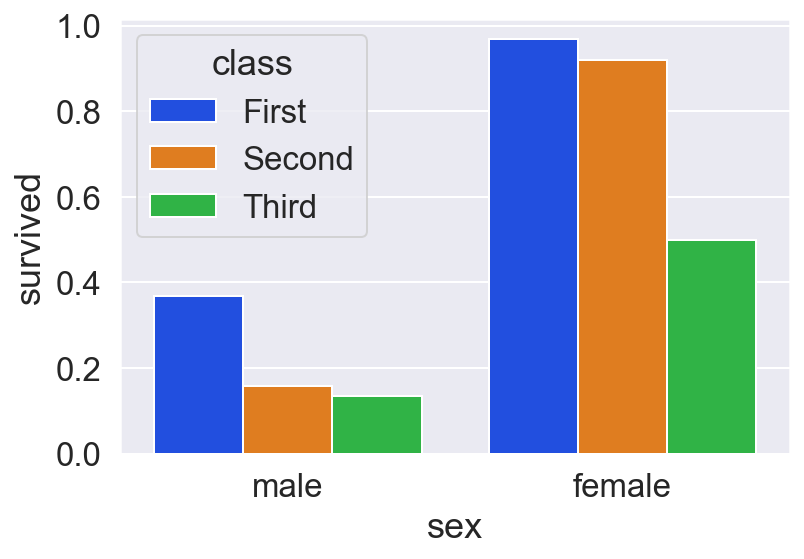

In [106]:
#성별 survived의 평균을 막대그래프로 
a=sns.barplot(ci=None,x="sex",y="survived",data=titanic,hue='class')#검은색반 95%실래구간 추정!

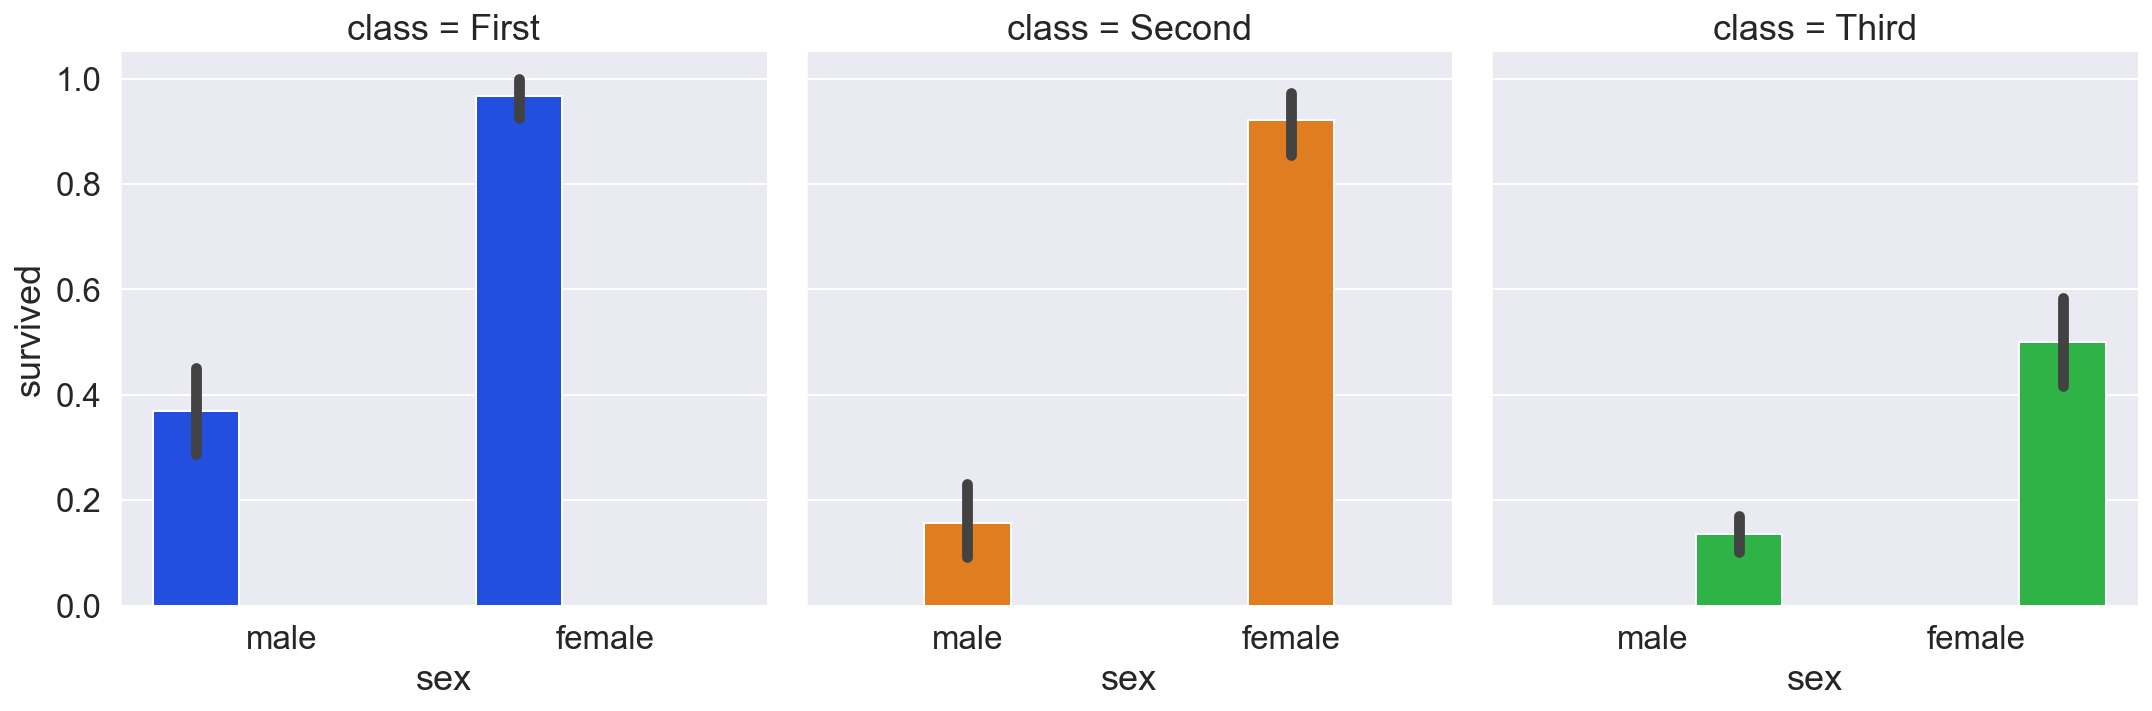

In [111]:
#barplot을 서브플롯으로:catplot
a=sns.catplot(x="sex",y="survived",data=titanic,hue='class',
             kind='bar',col='class')

In [113]:
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 오류

<AxesSubplot:xlabel='deck', ylabel='count'>

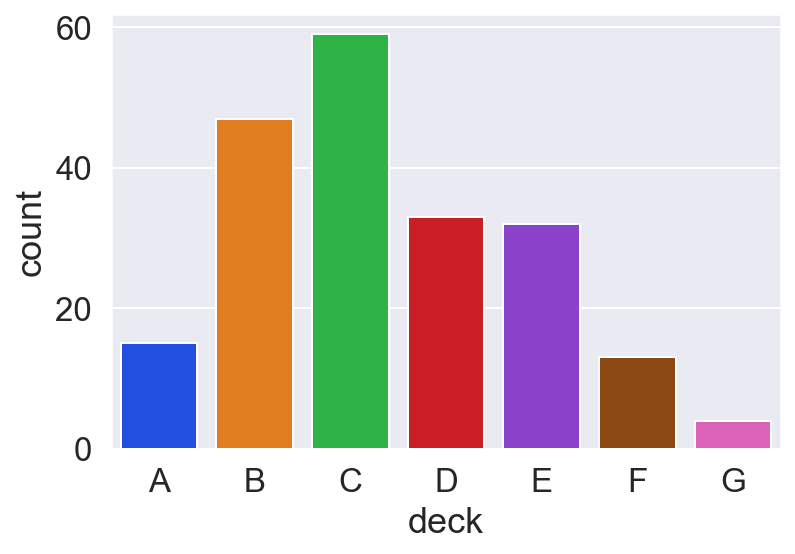

In [120]:
titanic['deck'].isnull().sum()
#deck별 관측수를 막대그래프로
sns.countplot(x='deck',data=titanic )#palette='Greens_d'

<AxesSubplot:xlabel='class', ylabel='survived'>

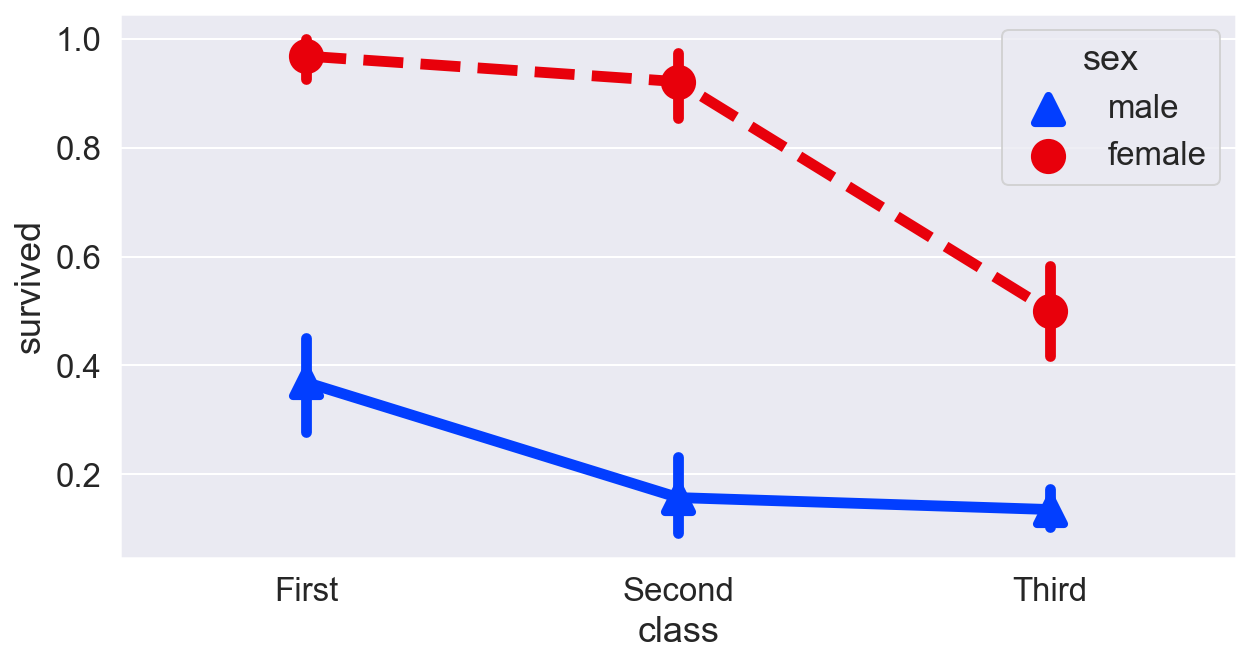

In [123]:
# class별 survied 값을 sex별로 pointplot
plt.figure(figsize=(10,5))
sns.pointplot(x='class',y='survived',hue='sex',data=titanic,
             palette={'male':'b',"female":'r'},
             markers=['^','o'],
             linestyles=['-','--'])

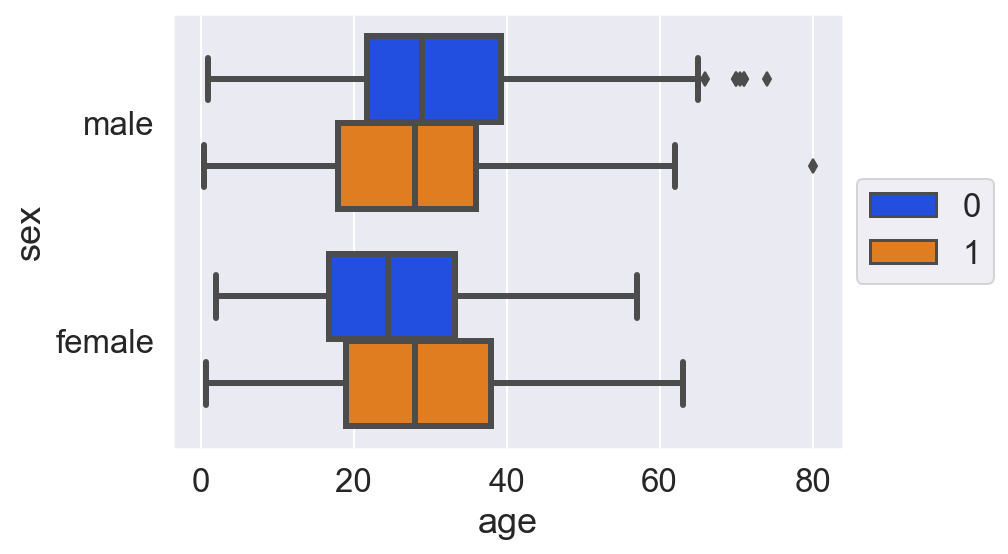

In [130]:
#https://www.autodesk.com/research/publications/same-stats-different-graphs
#boxplot,voilinplot,boxenplot
sns.boxplot(y='sex',x='age',data=titanic,hue='survived')
plt.legend(loc='center right',bbox_to_anchor=(1.25,0.5),ncol=1)

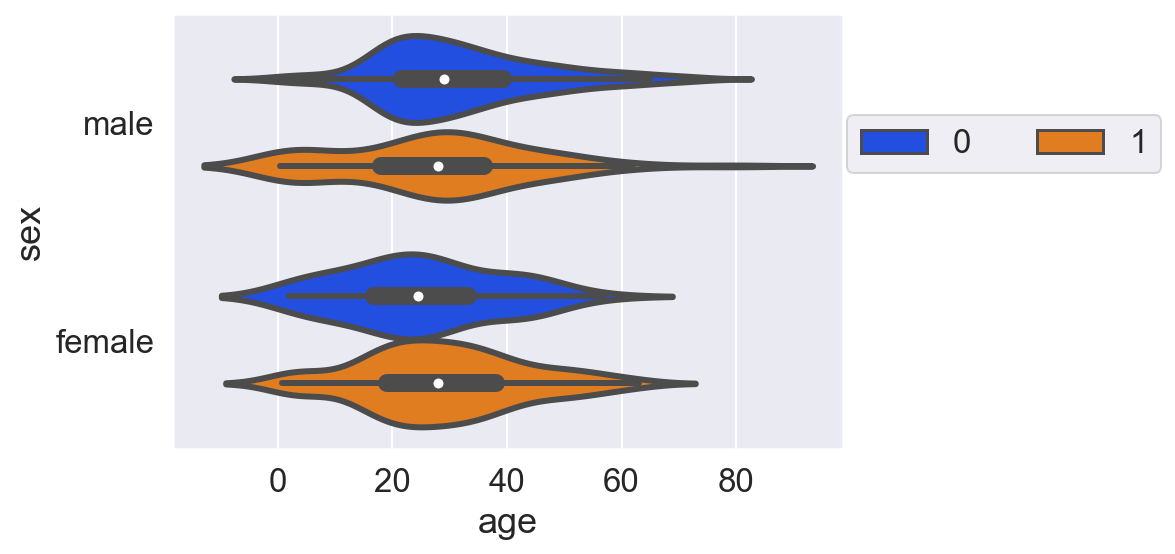

In [144]:
sns.violinplot(y='sex',x='age',data=titanic,hue='survived')
plt.legend(loc='center right',bbox_to_anchor=(1.50,0.7),ncol=2)
plt.show()

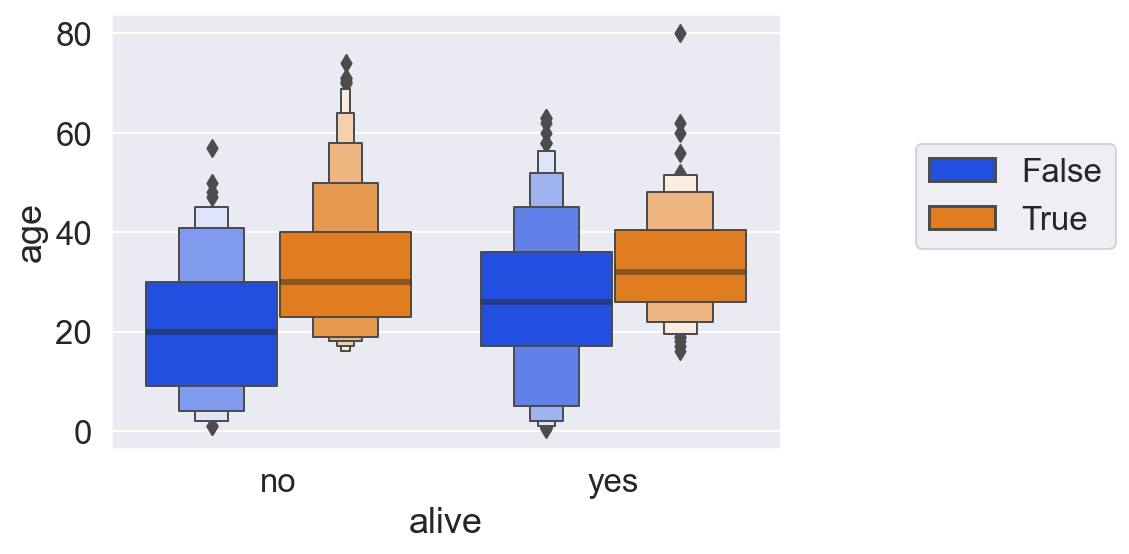

In [148]:
sns.boxenplot(x='alive',y='age',hue='adult_male',data=titanic)
plt.legend(bbox_to_anchor=(1.50,0.7),ncol=1,borderaxespad=0)

**3)쌍관계그래프**

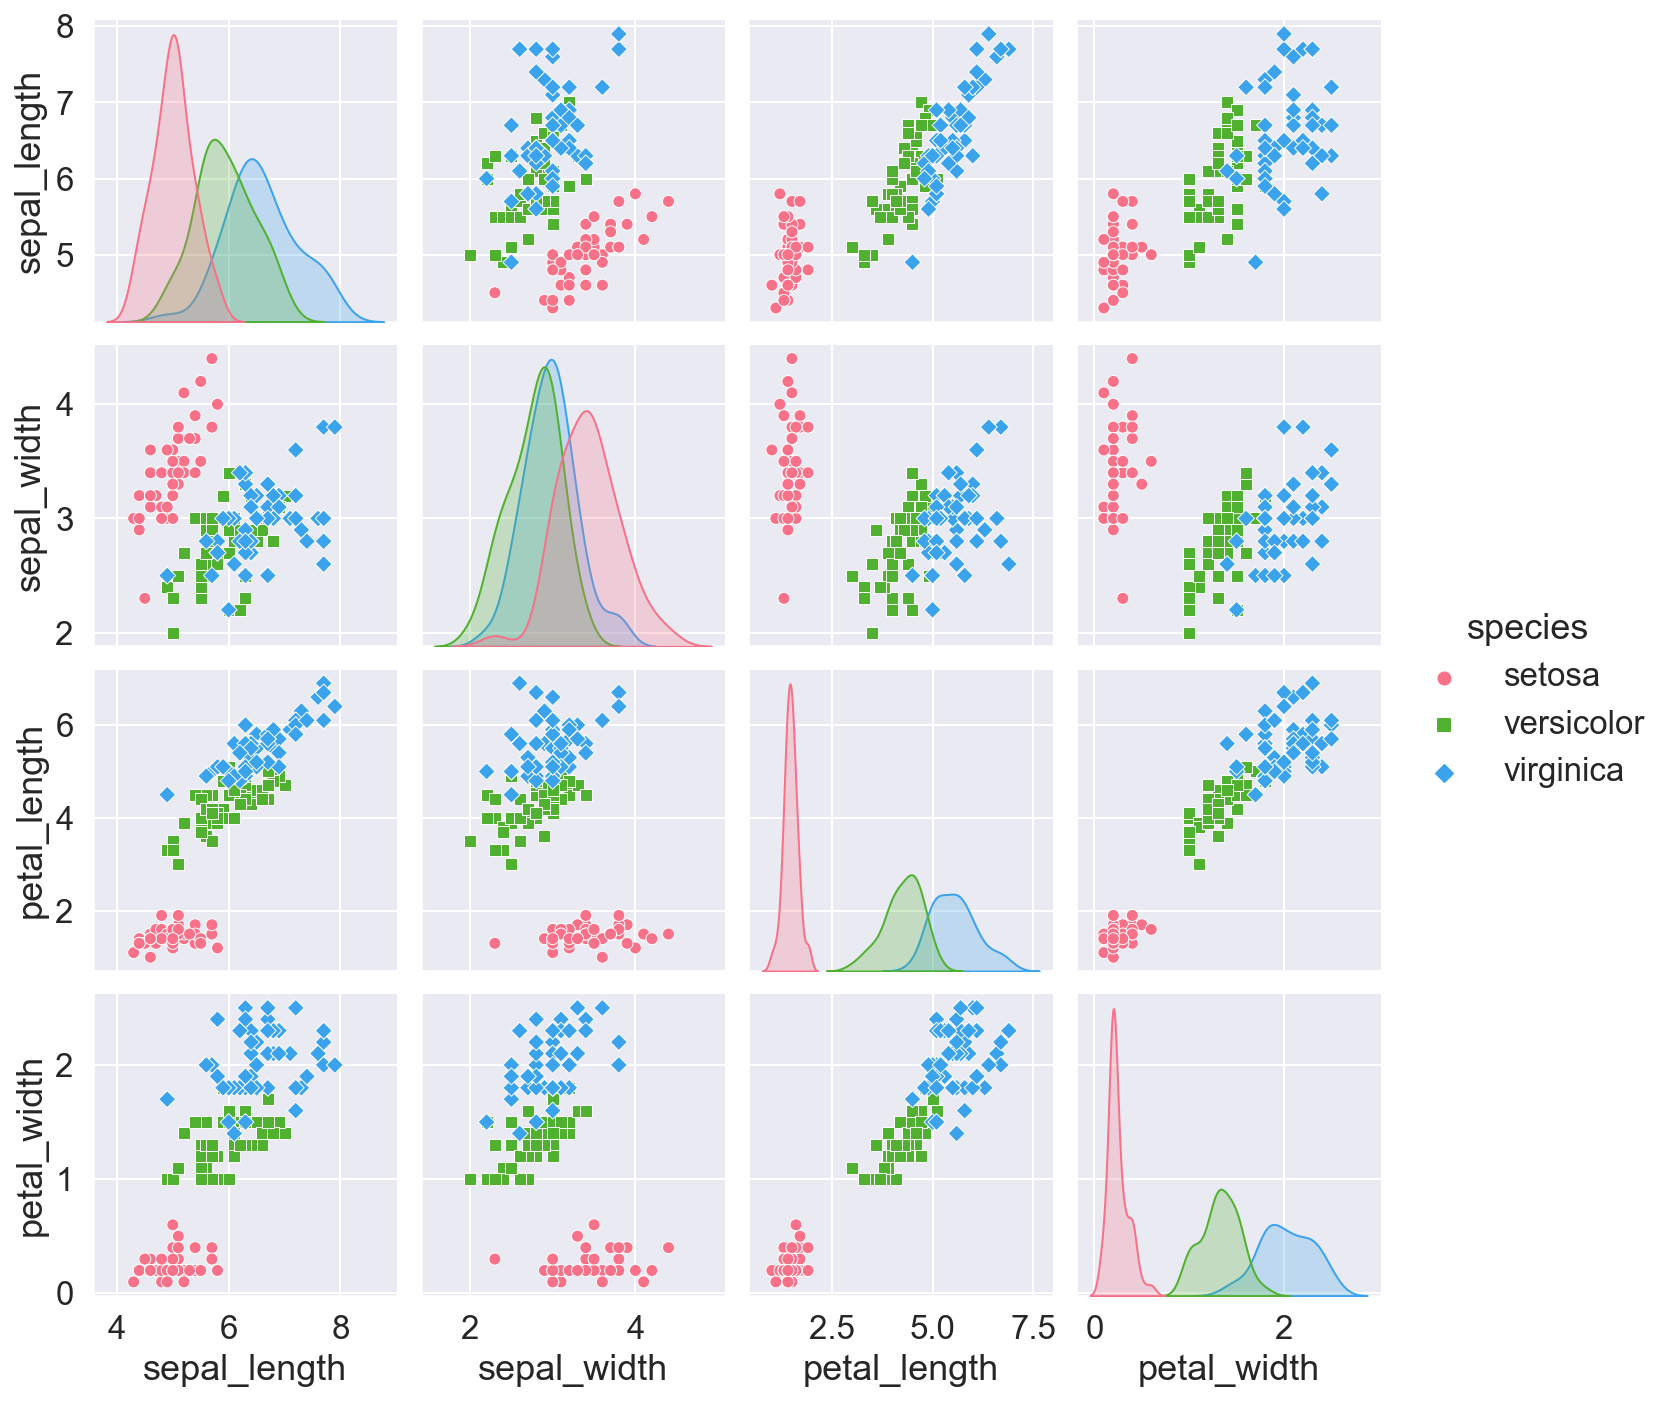

In [150]:
sns.pairplot(data=iris,hue='species',palette='husl',markers=['o','s','D'])#산점도!

In [152]:
import numpy as np
x= np.random.randn(100)
len(x)

100

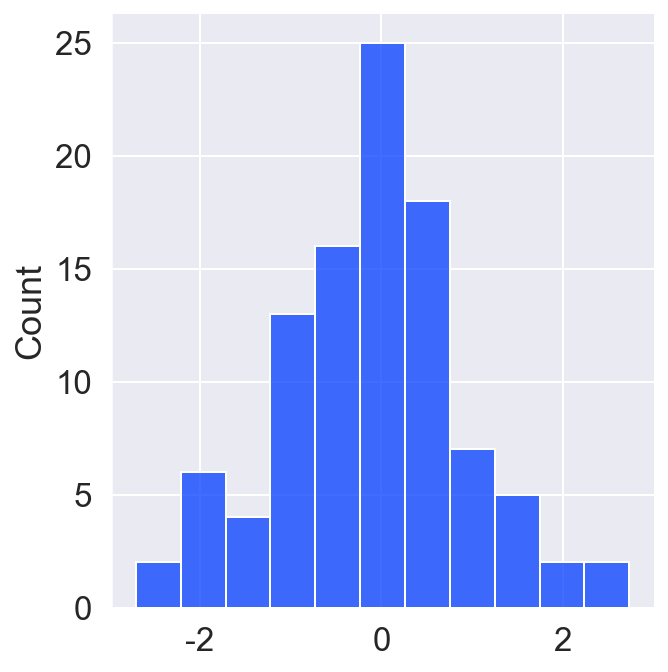

In [155]:
sns.displot(x,kde=False)

**4)회귀 그래프**

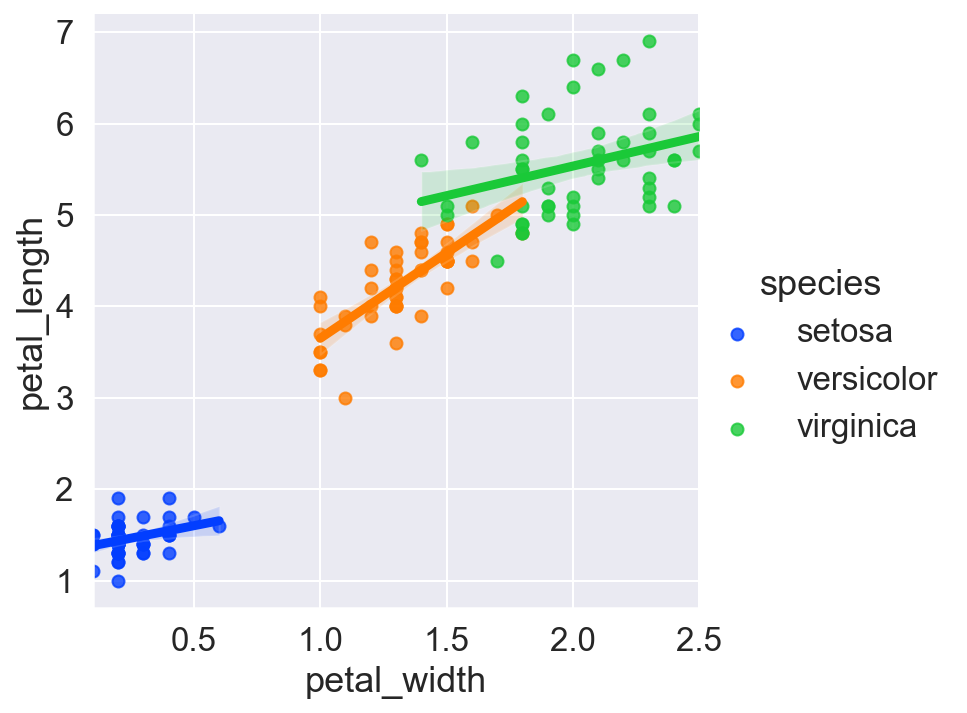

In [163]:
#회귀모형을 만드는 함수:lmplot,regplot
sns.lmplot(x="petal_width",y='petal_length',data=iris,hue='species')#회귀식도출

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

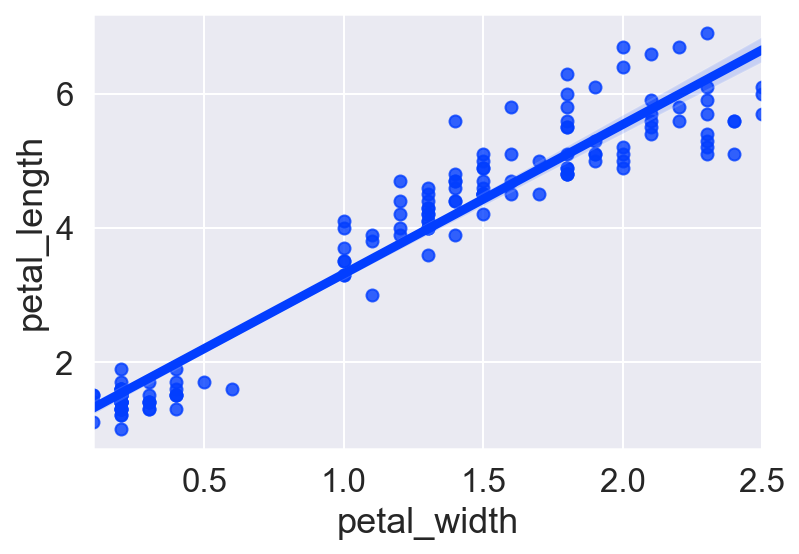

In [165]:
#회귀모형을 만드는 함수:lmplot,regplot
sns.regplot(x="petal_width",y='petal_length',data=iris)#회귀식도출

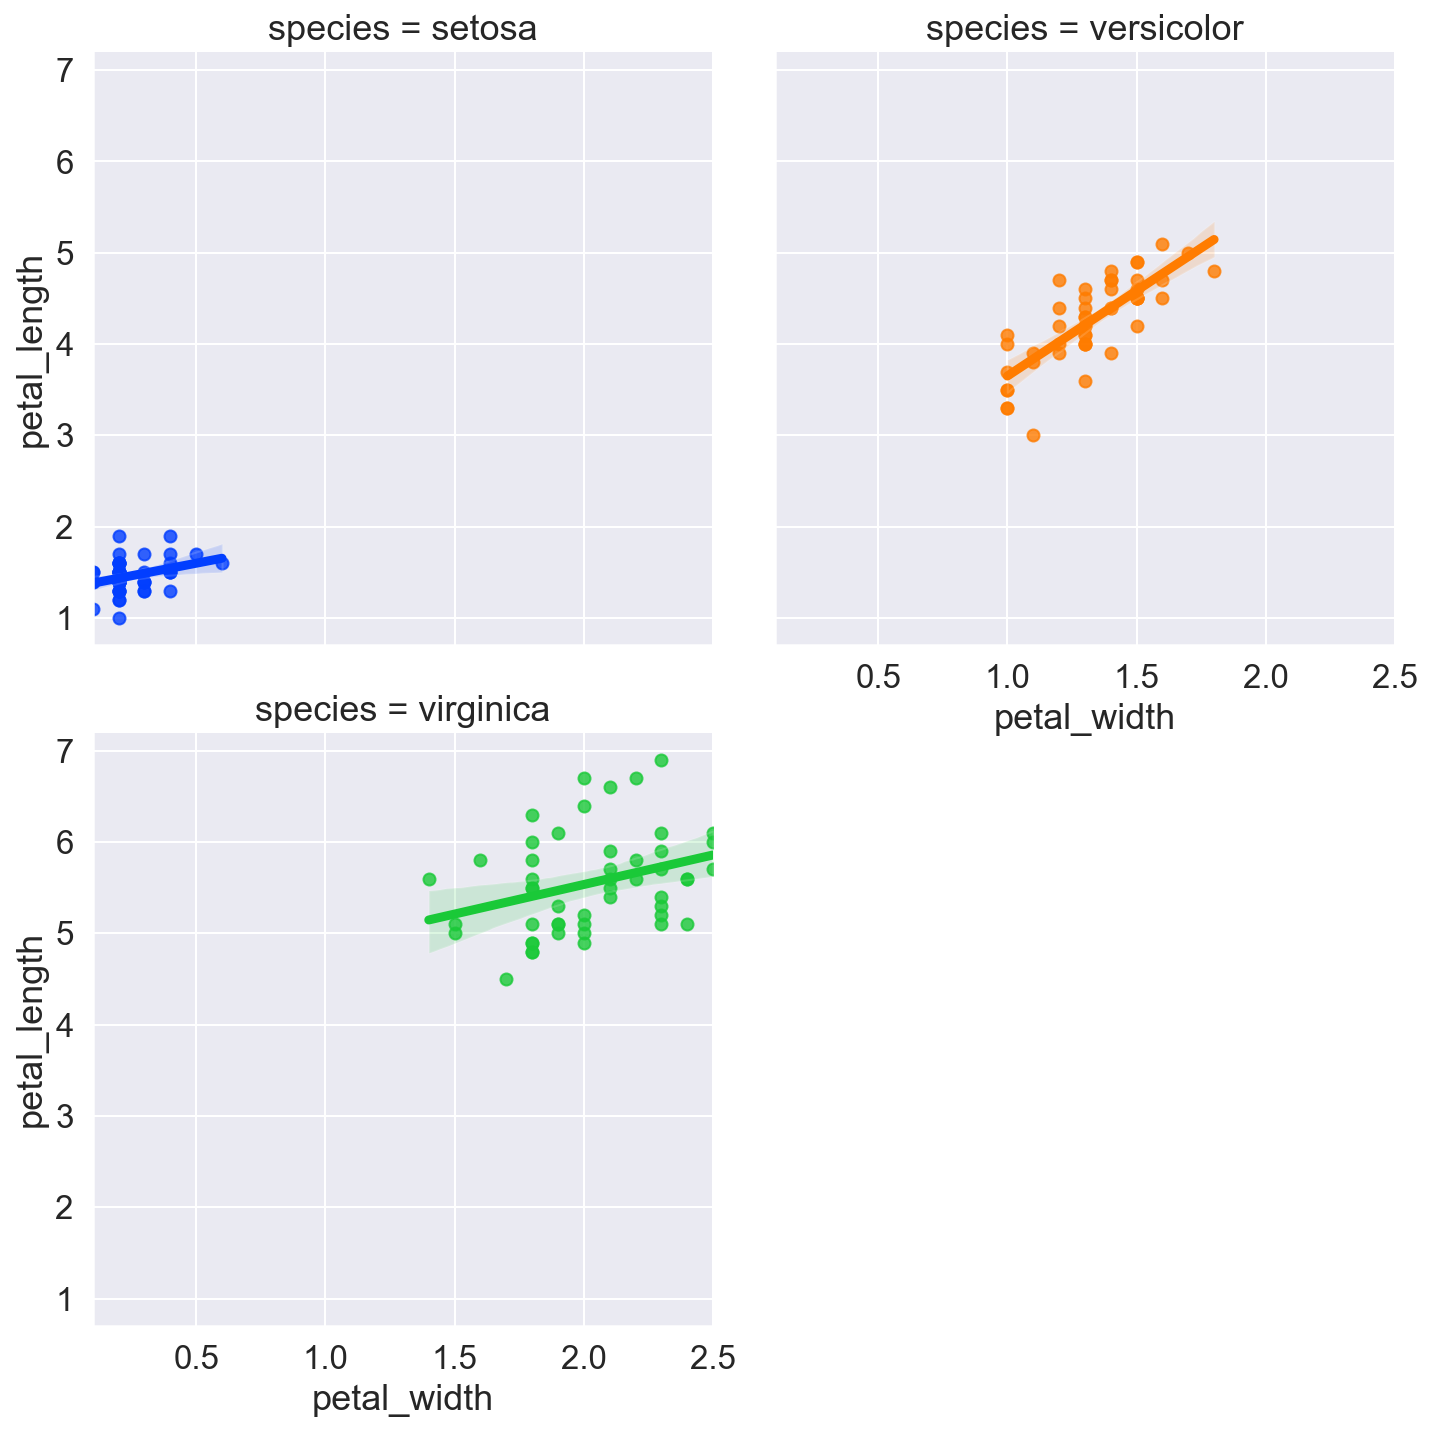

In [169]:
sns.lmplot(x='petal_width',y='petal_length',data=iris,hue='species',
          col='species',col_wrap=2)

**5)행렬그래프**

In [172]:
iris.corr()#데이터 프레임

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


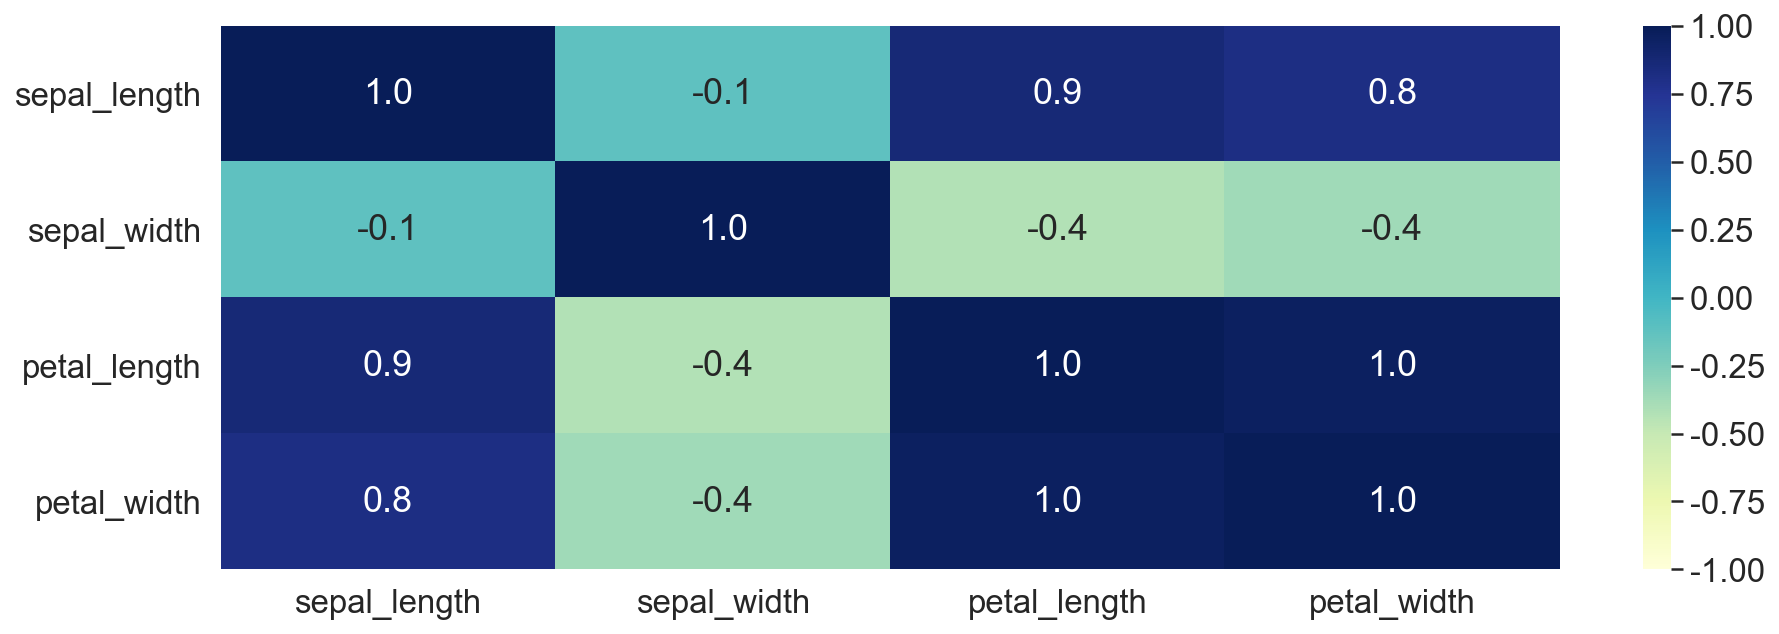

In [182]:
plt.figure(figsize=(15,5))
ax=sns.heatmap(iris.corr(),vmin=-1,vmax=1,annot=True, cmap='YlGnBu',
              fmt='.1f')

## 3.4다중 그래프를 위한 
- https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples

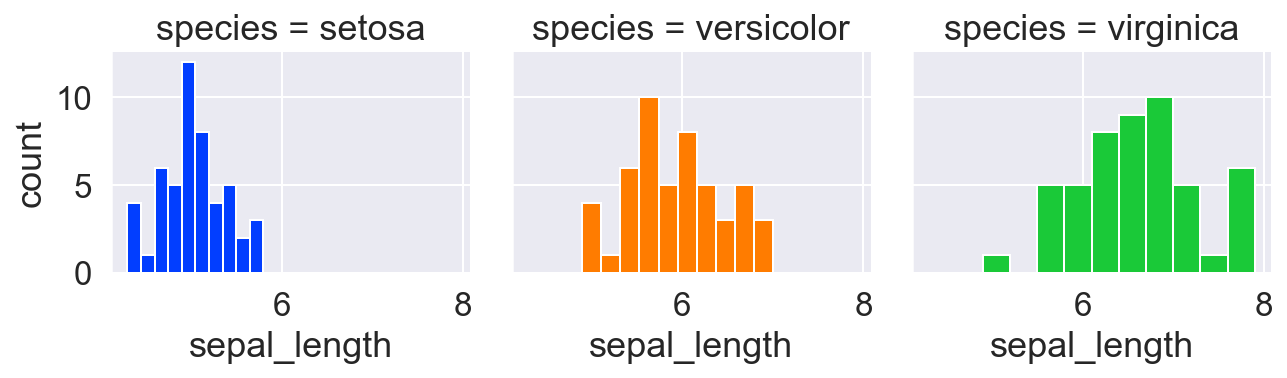

In [189]:
g = sns.FacetGrid(iris, col="species", hue='species')# col나누는것 hue 그룹별
g.map(plt.hist,'sepal_length')
g.set_axis_labels(y_var='count') #y축 라벨
plt.show()

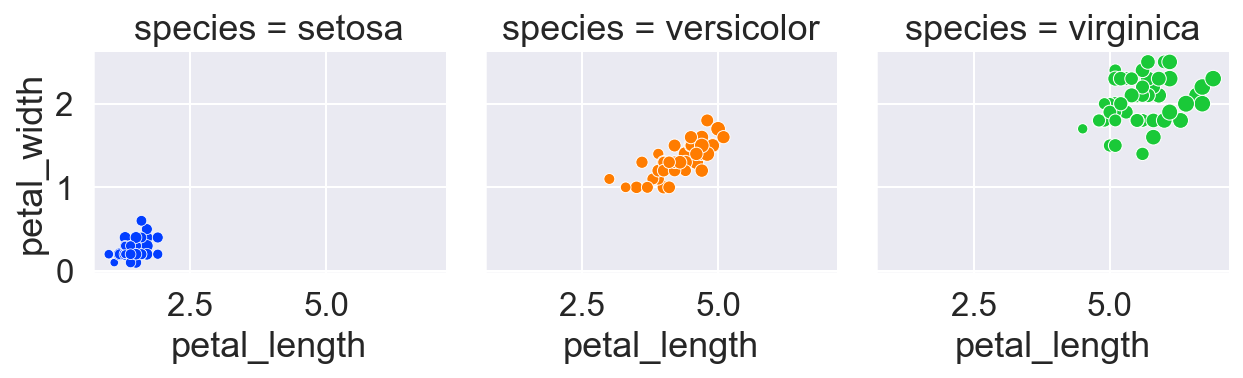

In [196]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(sns.scatterplot,'petal_length','petal_width',size=iris.sepal_length)
plt.savefig('파일이름.png')